<a href="https://colab.research.google.com/github/KeerthiSegu/DataScience-Assignments_Repository/blob/main/Mpg_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
EDA for Auto MPG Data Problem statement: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

Objective: Finding the characterstics of vehicles with Max MPG ,Finding the characterstics of vehicles with Max power Growth or improvements year by year ,Characterstics of vehicles based on Origin

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
df=pd.read_csv("/content/Project 2 Dataset.csv")

In [16]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [18]:
df.shape

(398, 9)

In [19]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [20]:
x=df[df['horsepower']=='?'].index


Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [26]:
df.drop([32, 126, 330, 336, 354, 374],axis=0,inplace=True)


In [31]:
df['horsepower']=df['horsepower'].astype('int')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [32]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [34]:
df['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 33.8, 32.7, 23.7, 32.4, 26.6, 25.8, 23.5, 39.1,
       39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6, 28.1,
       30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [138]:
df['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [36]:
df['displacement'].unique()

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. , 232. , 225. , 250. ,
       351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,  91. ,
        97.5,  70. , 120. ,  96. ,  98. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 145. , 112. , 181. , 144. ])

In [37]:
df['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82])

In [38]:
df['weight'].unique()

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2264, 2228, 2634, 3439,
       3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140, 2962,
       2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834, 1955,
       2278, 2126, 2254, 2226, 4274, 4385, 4135, 4129, 3672, 4633, 4502,
       4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979, 2189,
       2395, 2288, 2506, 2164, 2100, 4100, 3988, 4042, 3777, 4952, 4363,
       4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950, 4997,
       4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472, 2265,
       4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664, 3102,
       2901, 3336, 2451, 1836, 2542, 3781, 3632, 3613, 4141, 4699, 4457,
       4638, 4257, 2219, 1963, 2300, 1649, 2003, 2125, 2108, 2246, 2489,
       2391, 2000, 3264, 3459, 3432, 3158, 4668, 44

In [39]:
df['acceleration'].unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 13. , 19. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

In [40]:
df['origin'].unique()

array([1, 3, 2])

In [41]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

#1 Continuous variables
(mpg, displacement, horsepower,weight, acceleration)

(array([13., 78., 73., 58., 53., 48., 37., 22.,  4.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

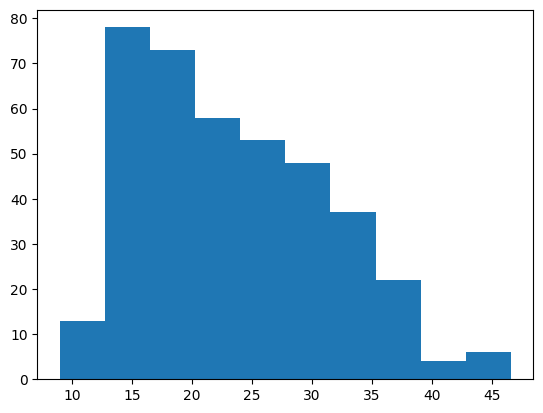

In [43]:
plt.hist(df['mpg'])

In [49]:
print(df['mpg'].min(),df['mpg'].max(),df['mpg'].std())

9.0 46.6 7.8050074865717995


In [54]:
count=0
for i in df['mpg']:
  if i>15 and i<30:
    count+=1
count

233

In [55]:
p=(count/392)*100
p

59.43877551020408

# Insights


1.  Minimum MPG for the given list of cars is 9.0

2.  Maximum MPG for the given list of cars is 46.6

1.  There are around 233 cars whose MPG lies between 15 to 30 and it is around 60% of the cars.

2.  Around 40% of the Cars MPG are less then 15 and more than 30




(array([104.,  88.,  30.,  12.,  57.,   3.,  42.,  31.,  16.,   9.]),
 array([ 68. , 106.7, 145.4, 184.1, 222.8, 261.5, 300.2, 338.9, 377.6,
        416.3, 455. ]),
 <BarContainer object of 10 artists>)

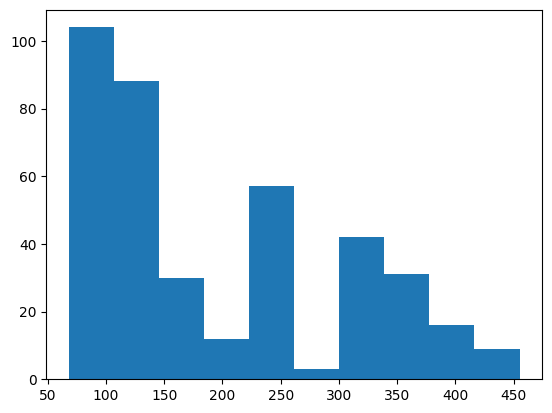

In [60]:
plt.hist(df['displacement'])

In [62]:
print(df['displacement'].max(),df['displacement'].min())

455.0 68.0


In [64]:
count1=0
count2=0
count3=0
for i in df['displacement']:
  if i>=300 and i<=455:
    count1+=1
  elif i>=68 and i<=150:
    count2+=1
  else:
    count3+=1
p1=(count1/392)*100
p2=(count2/392)*100
p3=(count3/392)*100
print(count1,count2,count3)
print(p1,p2,p3)

98 195 99
25.0 49.744897959183675 25.255102040816325


#Insights


1.  Maximum Displacement of a cars is 455. 
2.  Minimum Displacement of a cars is 68. 

1.  There are total 98 cars whose displacement is between 300 to 455 and it is of total 25%   
2. There are total 195 cars whose displacement is between 65 to 150 and it is of total 49.7%
3. There are total 99 cars whose displacement is between 151 to 299 and it is of total 25.25%  





(array([30., 89., 58., 52., 36., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

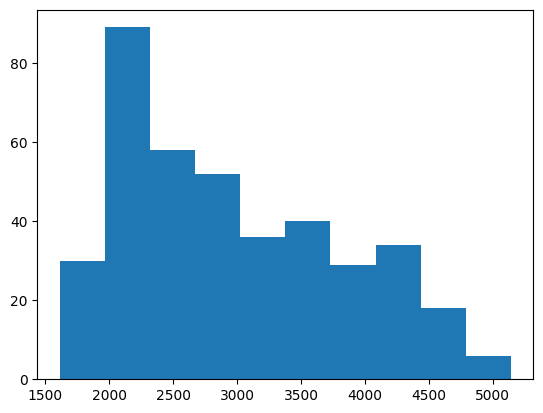

In [66]:
plt.hist(df['weight'])

<Axes: xlabel='acceleration'>

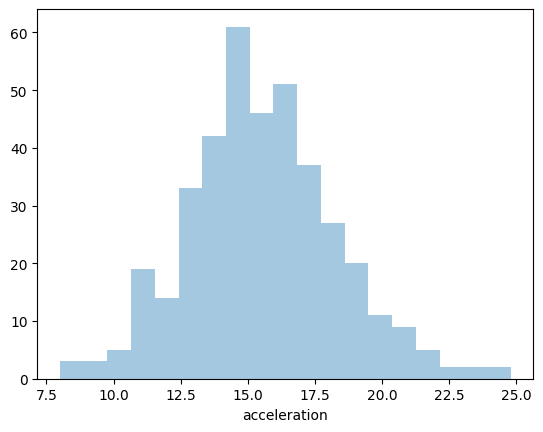

In [68]:
sns.distplot(df['acceleration'],kde=False)

(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

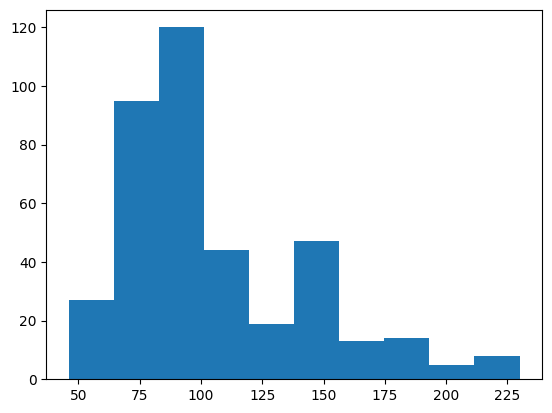

In [70]:
plt.hist(df['horsepower'])

In [72]:
print(df['horsepower'].min(),df['horsepower'].max())

46 230


In [73]:
c1=0
c2=0
c3=0
for i in df['horsepower']:
  if i>=46 and i<=100:
    c1+=1
  elif i>100 and i<=160:
    c2+=1
  else:
    c3+=1
p1=(c1/392)*100
p2=(c2/392)*100
p3=(c3/392)*100
print(p1,c1,p2,c2,p3,c3)

61.73469387755102 242 28.8265306122449 113 9.438775510204081 37


# Insights


1.   Maximum horsepower of the cars is 230

1.   Minimum horsepower of the cars is 46
2.   Max number of the cars has the horsepower between 46 to 100 which is of 61.73%

4.   There are total of 113 cars whose horsepower lies between 101 to 160 and it is of 28.82%

4.  There are total of 37 cars whose horsepower lies between 161 to 230 and it is of 9.4%

6. Maximum number of cars has high Horsepower is between 82.8 and 101.2



# 2 continuous variables

<Axes: xlabel='mpg', ylabel='acceleration'>

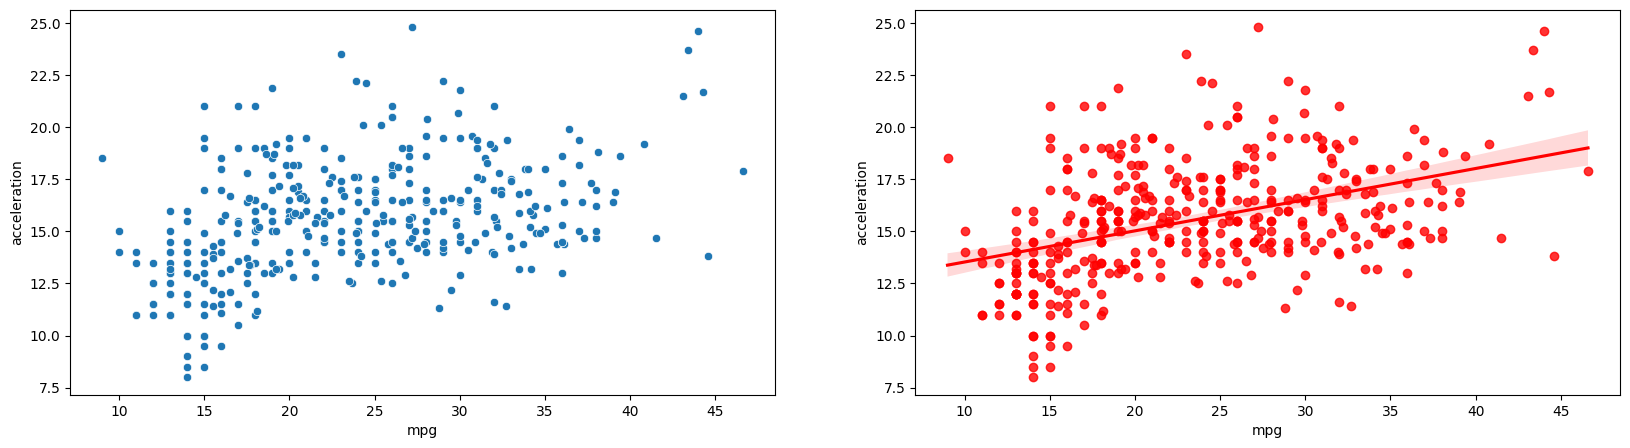

In [78]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df['mpg'],y=df['acceleration'])

plt.subplot(1,2,2)
sns.regplot(x=df['mpg'],y=df['acceleration'], color='r')

In [81]:
df['mpg'].corr(df['acceleration'])

0.4233285369027874

# Insights

MPG and Acceleration are showing week positive correlation mean increase in acceleration may increase the MPG but cannot completely say this as the correlation is week

<Axes: xlabel='mpg', ylabel='displacement'>

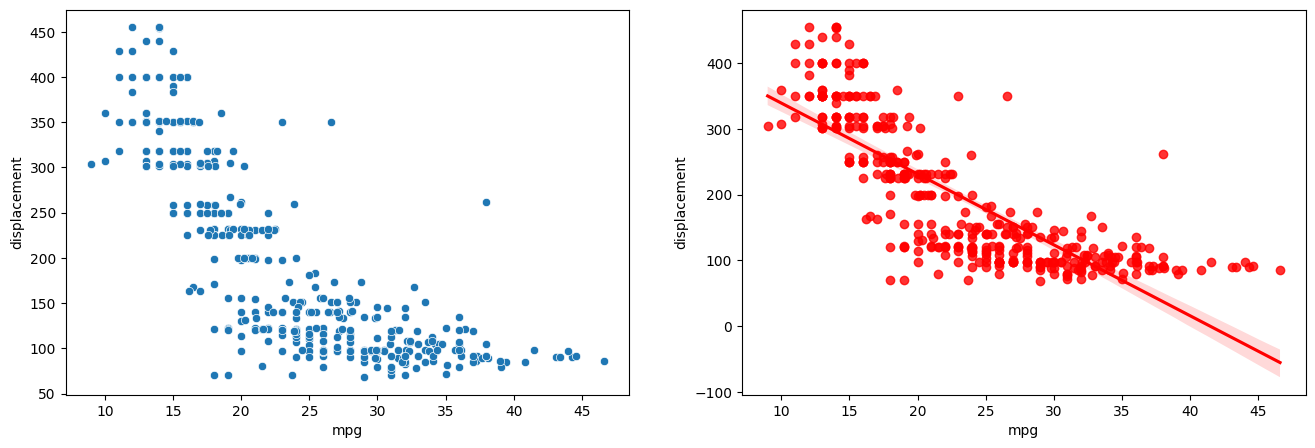

In [85]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df['mpg'],y=df['displacement'])
plt.subplot(1,2,2)
sns.regplot(x=df['mpg'],y=df['displacement'],color='r')

In [86]:
df['mpg'].corr(df['displacement'])

-0.8051269467104578

# Insights


1. MPG and Displacement are showing Strong Negative correlation

2. With increase in displacement of the car MPG decreases  



<Axes: xlabel='mpg', ylabel='horsepower'>

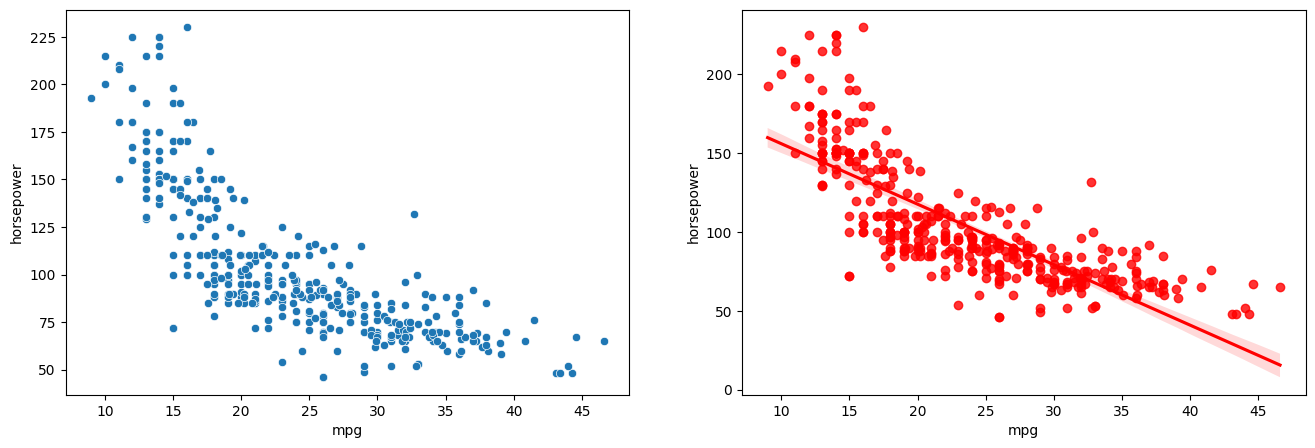

In [87]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df['mpg'],y=df['horsepower'])
plt.subplot(1,2,2)
sns.regplot(x=df['mpg'],y=df['horsepower'],color='r')

In [88]:
df['mpg'].corr(df['horsepower'])

-0.7784267838977756

In [91]:
max_h=df["horsepower"].idxmax()
print(df["horsepower"].max())
print(max_h)
print(df.iloc[115,0])
df.iloc[115]


230
116
16.0


mpg                           16.0
cylinders                        8
displacement                 400.0
horsepower                     230
weight                        4278
acceleration                   9.5
model year                      73
origin                           1
car name        pontiac grand prix
Name: 116, dtype: object

# Insights

1. MPG and Horsepower shows strong negative correlation.

2. With decrease in Horsepower ,MPG Increases.
3.The MPG of Max horse power(230) Car is 16.

<Axes: xlabel='weight', ylabel='acceleration'>

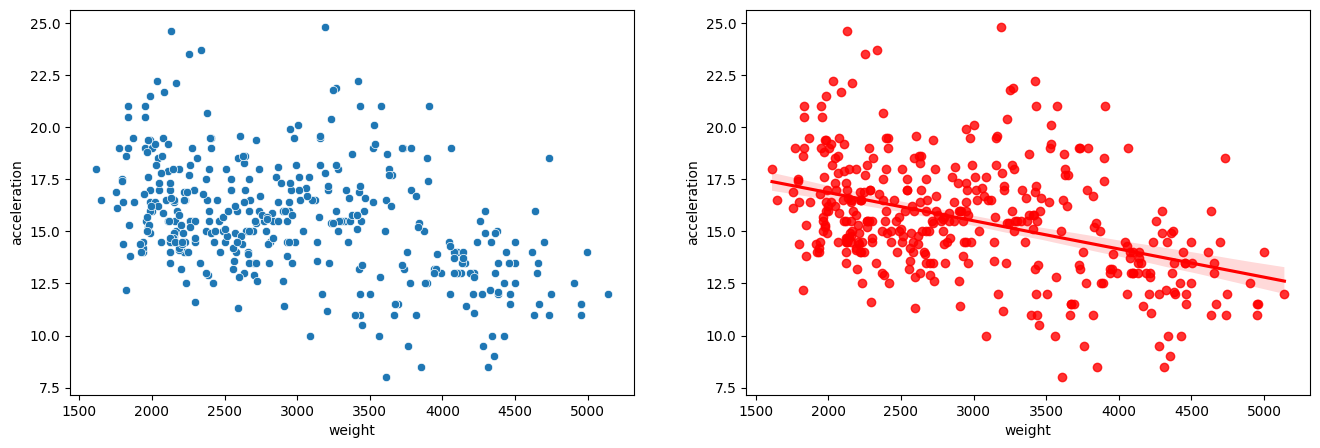

In [92]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df['weight'],y=df['acceleration'])
plt.subplot(1,2,2)
sns.regplot(x=df['weight'],y=df['acceleration'],color='r')

In [93]:
df['weight'].corr(df['acceleration'])

-0.4168392020037069

# Insights

Weight and Acceleration shows weak negative correlation

<Axes: xlabel='displacement', ylabel='horsepower'>

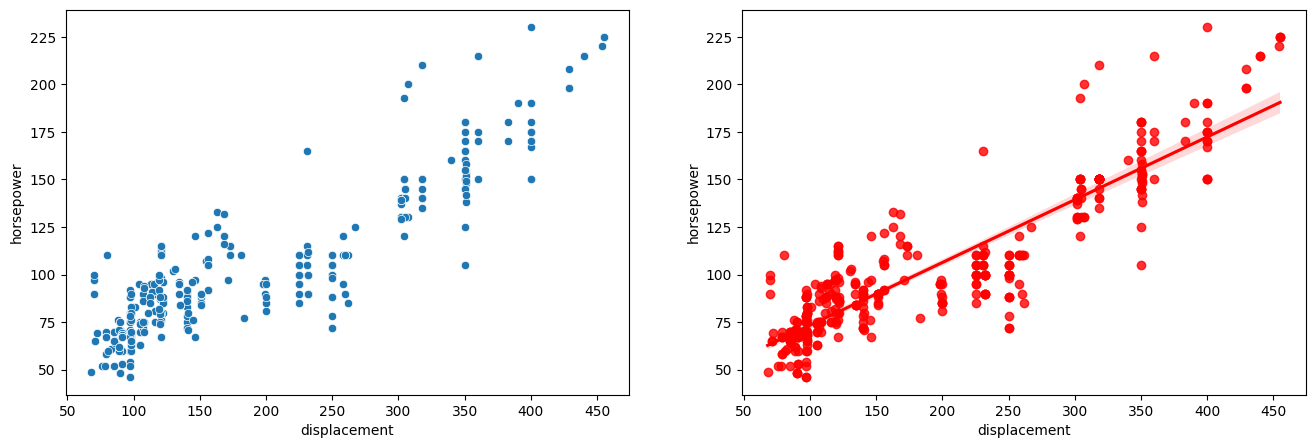

In [94]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df['displacement'],y=df['horsepower'])
plt.subplot(1,2,2)
sns.regplot(x=df['displacement'],y=df['horsepower'],color='r')

In [95]:
df['displacement'].corr(df['horsepower'])

0.8972570018434685

In [100]:
max_i=df['horsepower'].idxmax()
print(max_i)
print(df['horsepower'].max())
df.iloc[115,2]

116
230


400.0

# Insights

1. Dispalcement and horsepower is showing strong positive Correlation.

2. With increase in Displacement, Horsepower increases.

3. For maximum horsepower (230) the displacement is 400

# Categorical Variables

(Origin,Cylinders,model year)

([<matplotlib.patches.Wedge at 0x7f7e99afa740>,
 [Text(-0.42095177560159874, 1.0162674857624154, '1'),
  Text(-0.16685167040745827, -1.0872720543094267, '3'),
  Text(0.9406570273206045, -0.570231844912544, '2')])

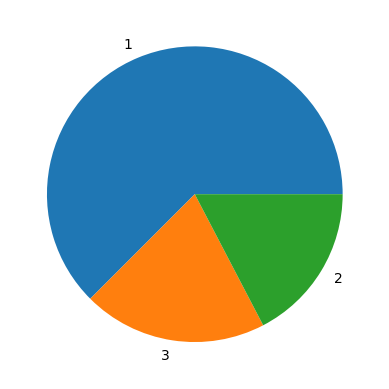

In [103]:
plt.pie(df['origin'].value_counts(),labels=df['origin'].value_counts().index)

# Insights

1. More number of cars are manufactured from "Origin 1"

2. Cars manufactured from other 2 origins are together less than origin 1

([<matplotlib.patches.Wedge at 0x7f7e9994d360>,
 [Text(1.0439613179034968, 0.34661905129579096, '73'),
  Text(0.6579215616427304, 0.881555000397361, '78'),
  Text(0.0880625553475244, 1.096469327589999, '76'),
  Text(-0.4613262055545219, 0.9985880692601264, '75'),
  Text(-0.8708967152767031, 0.6719664510377356, '82'),
  Text(-1.0813655895247318, 0.2016146368491866, '70'),
  Text(-1.0570090307197477, -0.30451914385946127, '79'),
  Text(-0.814305727896221, -0.7395310551392725, '72'),
  Text(-0.412793589935454, -1.019608479813796, '77'),
  Text(0.07047738827987844, -1.0977399226325184, '81'),
  Text(0.5320909045854212, -0.9627456929311439, '71'),
  Text(0.886799451129853, -0.6508354119712537, '80'),
  Text(1.0762061538522207, -0.22755288266820584, '74')])

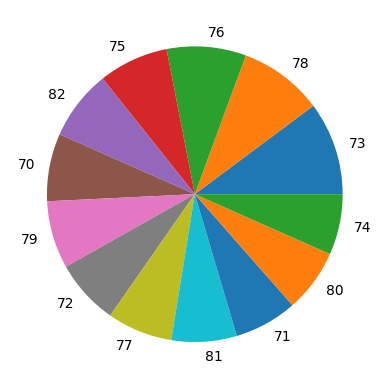

In [104]:
plt.pie(df['model year'].value_counts(),labels=df['model year'].value_counts().index)

In [111]:
df['model year'].value_counts()

73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: model year, dtype: int64

# Insights

1. Maximum number of cars are manufactured in the year 73

2. Minimum number of cars are manufactured in the year 74

([<matplotlib.patches.Wedge at 0x7f7e999c39d0>,
 [Text(-0.026444520495172492, 1.0996820846661914, '4'),
  Text(-0.7063157688542481, -0.8432781478657161, '8'),
  Text(0.7840260114026327, -0.7715589500771013, '6'),
  Text(1.096469320633267, -0.08806264196594316, '3'),
  Text(1.099682083273488, -0.02644457840998585, '5')])

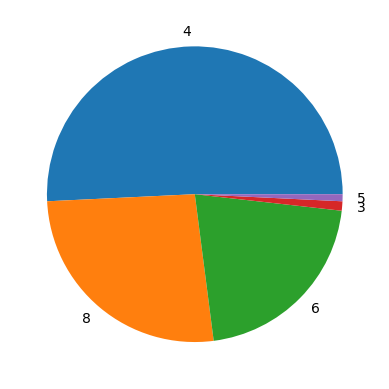

In [112]:
plt.pie(df['cylinders'].value_counts(),labels=df['cylinders'].value_counts().index)

In [113]:
df['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

# Insights

1.Maximum number of cars(199) has 4 cylinders.

2.Minimum number of cars(3) has 5 cylinders.

3.103 cars has 8 Cylinders.

#1 class 1 continuous

1.mpg vs origin

2.mpg vs cylinders

3.mpg vs modal year

4.horsepower vs Origin

5.horsepower vs cylendars

6.horsepower vs modal year




<Axes: xlabel='origin', ylabel='mpg'>

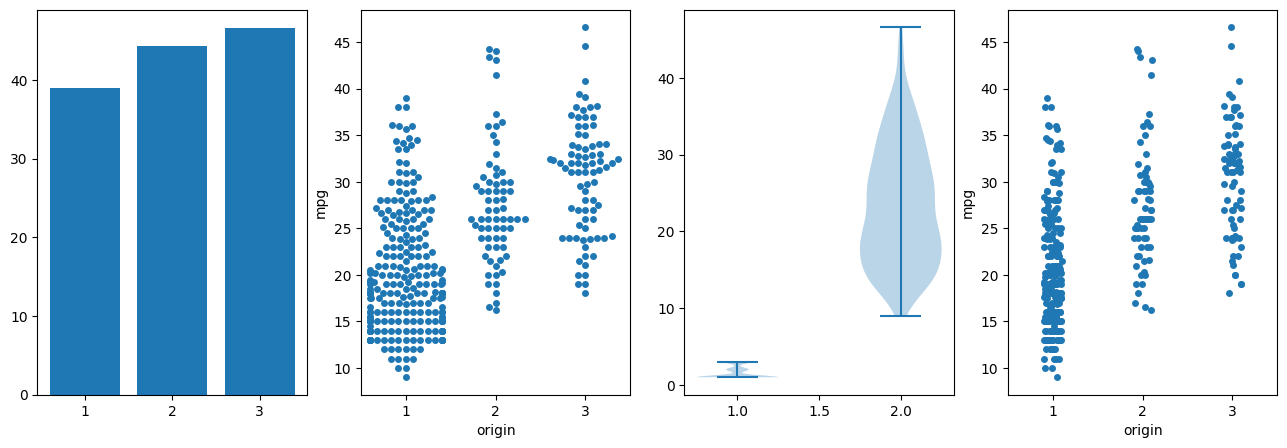

In [128]:
###MPG Vs Origin

data=(df['origin'],df['mpg'])
plt.figure(figsize=(16,5))

plt.subplot(1,4,1)
plt.bar(df['origin'],df['mpg'])

plt.subplot(1,4,2)
sns.swarmplot(x=df['origin'],y=df['mpg'])

plt.subplot(1,4,3)
plt.violinplot(data)

plt.subplot(1,4,4)
sns.stripplot(x=df['origin'],y=df['mpg'])

# Insights

1. Maximum number of cars are manufactured from origin 3

2. Least number od caes are manufactured from origin 1

<Axes: xlabel='cylinders', ylabel='mpg'>

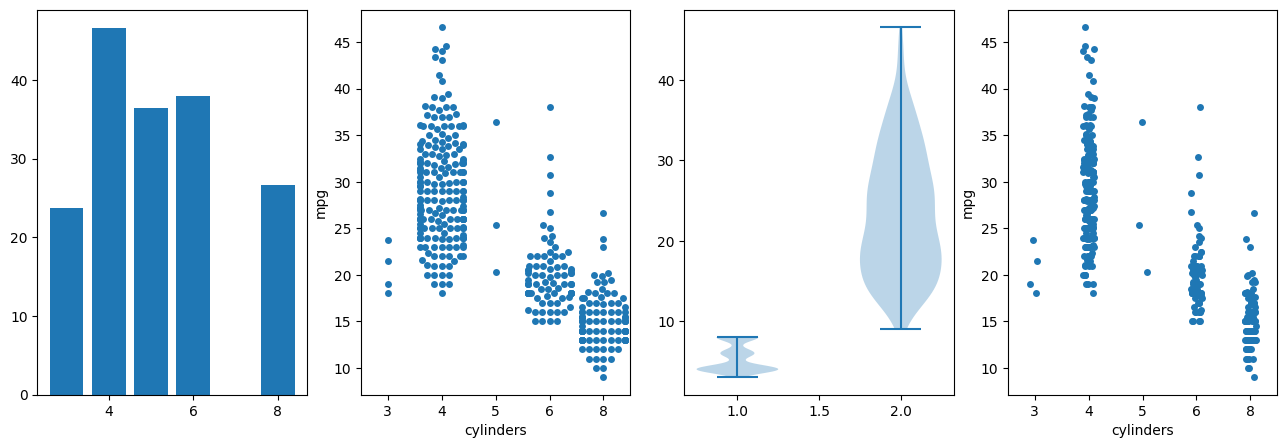

In [131]:
###MPG Vs Cylinders

data=(df['cylinders'],df['mpg'])
plt.figure(figsize=(16,5))

plt.subplot(1,4,1)
plt.bar(df['cylinders'],df['mpg'])

plt.subplot(1,4,2)
sns.swarmplot(x=df['cylinders'],y=df['mpg'])

plt.subplot(1,4,3)
plt.violinplot(data)

plt.subplot(1,4,4)
sns.stripplot(x=df['cylinders'],y=df['mpg'])

# Insights

1. Cars with high MPG has 4 cylinders.

2. Cars with 8 Cylinders has lower MPG values

<Axes: xlabel='model year', ylabel='mpg'>

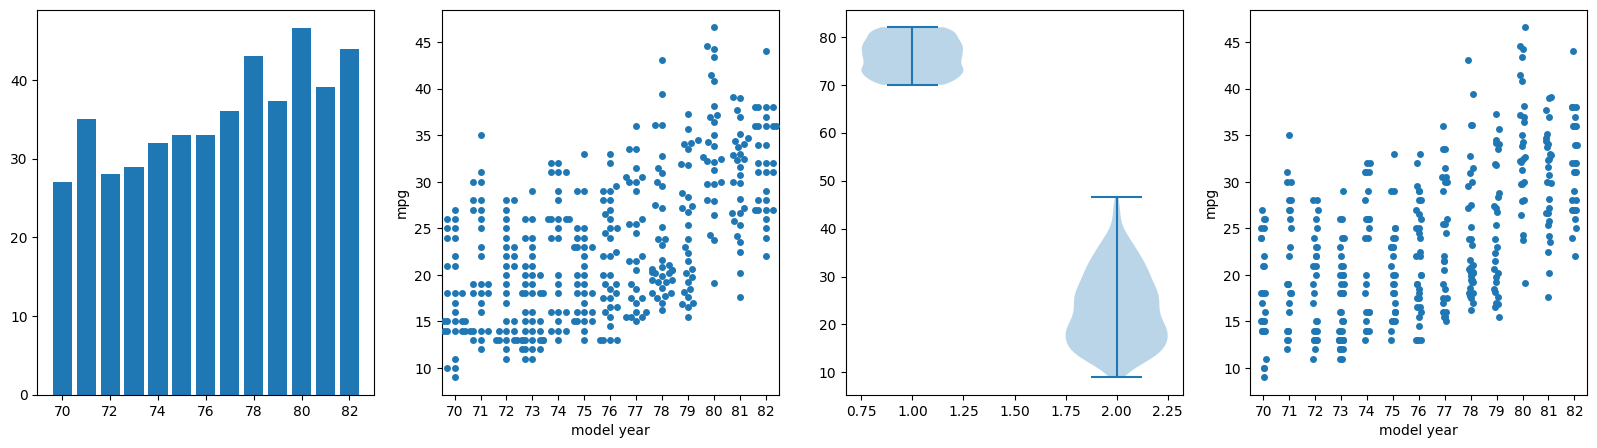

In [134]:
###ModelYear Vs MPG

data=(df['model year'],df['mpg'])
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.bar(df['model year'],df['mpg'])

plt.subplot(1,4,2)
sns.swarmplot(x=df['model year'],y=df['mpg'])

plt.subplot(1,4,3)
plt.violinplot(data)

plt.subplot(1,4,4)
sns.stripplot(x=df['model year'],y=df['mpg'])

# Insights

1. Cars Manufactures in the year 80 has maximum MPG

2. Cars with minimum MPG is manufactured in the year 70



<Axes: xlabel='origin', ylabel='horsepower'>

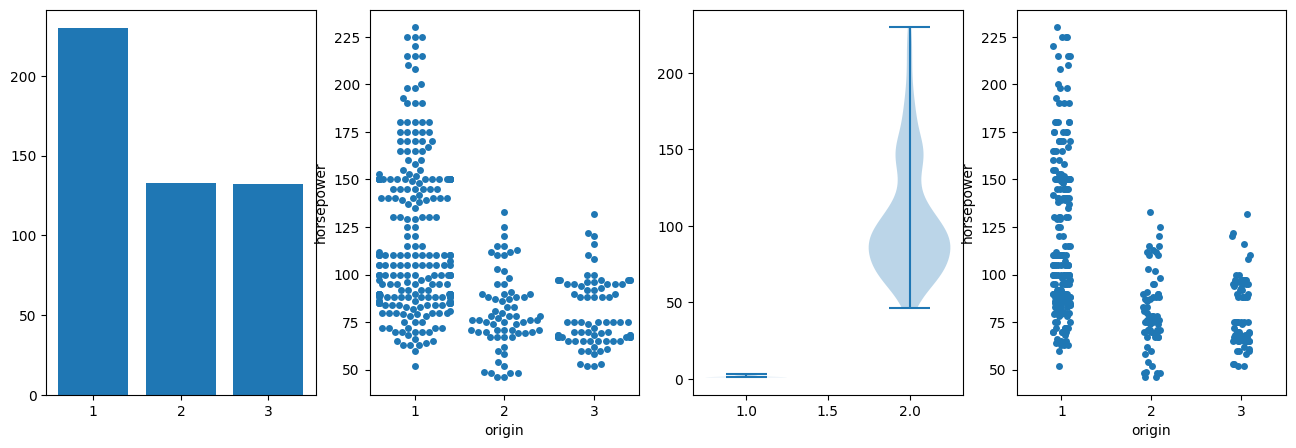

In [135]:
#####. Origin Vs Horsepower

data=(df['origin'],df['horsepower'])
plt.figure(figsize=(16,5))

plt.subplot(1,4,1)
plt.bar(df['origin'],df['horsepower'])

plt.subplot(1,4,2)
sns.swarmplot(x=df['origin'],y=df['horsepower'])

plt.subplot(1,4,3)
plt.violinplot(data)

plt.subplot(1,4,4)
sns.stripplot(x=df['origin'],y=df['horsepower'])

# Insights

1.Cars Manufactured in Origin 1 has highest Horsepower

2.Cars Manufactured in remaining two origins has same horsepower

<Axes: xlabel='cylinders', ylabel='horsepower'>

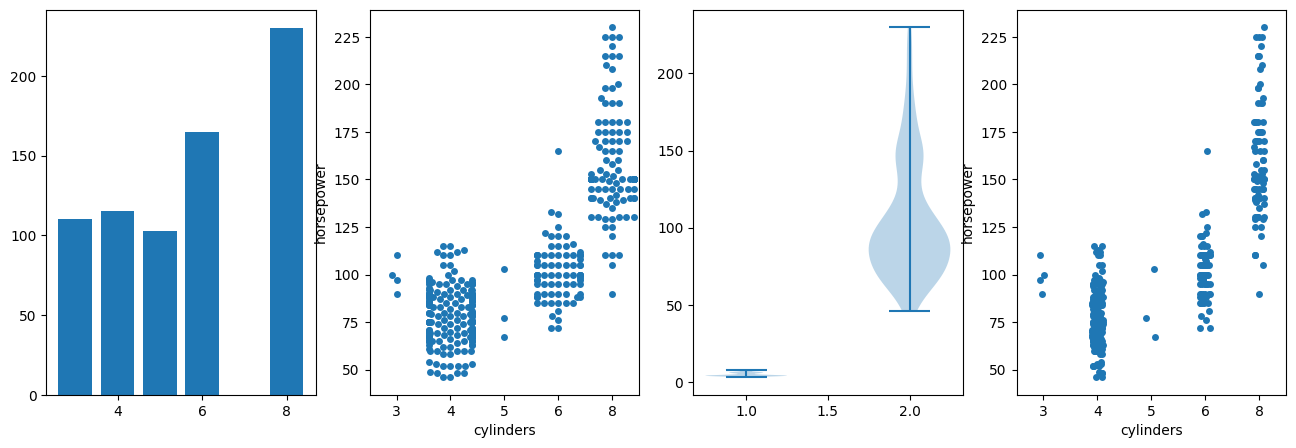

In [136]:
##### Cylinders Vs Horsepower 

data=(df['cylinders'],df['horsepower'])
plt.figure(figsize=(16,5))

plt.subplot(1,4,1)
plt.bar(df['cylinders'],df['horsepower'])

plt.subplot(1,4,2)
sns.swarmplot(x=df['cylinders'],y=df['horsepower'])

plt.subplot(1,4,3)
plt.violinplot(data)

plt.subplot(1,4,4)
sns.stripplot(x=df['cylinders'],y=df['horsepower'])

# Insights

1.Cars with 8 cylinders has maximum Horsepower.

2.Cars with least(5) cylinders has minimum Horsepower.

<Axes: xlabel='model year', ylabel='horsepower'>

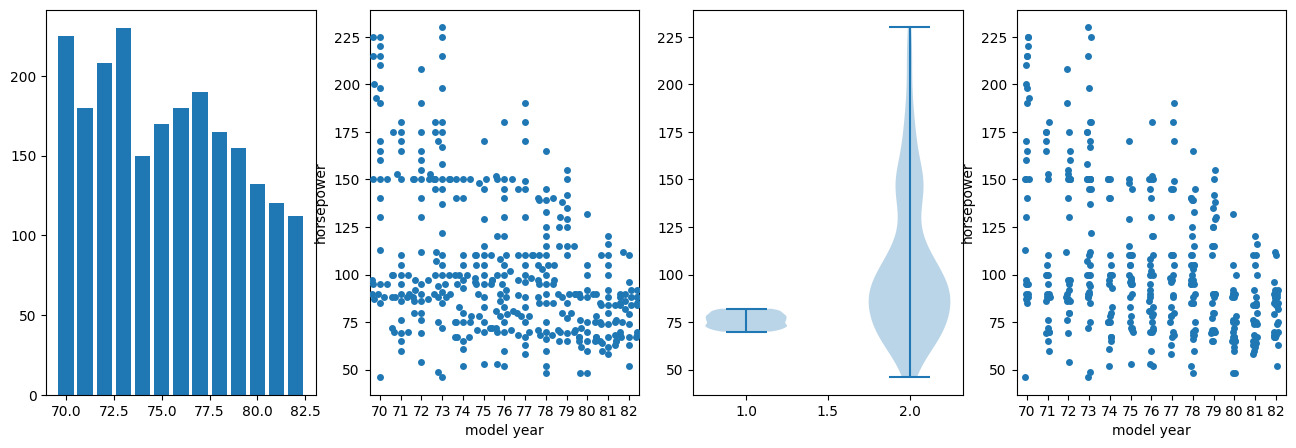

In [139]:
### Horsepower Vs Model year
data=(df['model year'],df['horsepower'])
plt.figure(figsize=(16,5))

plt.subplot(1,4,1)
plt.bar(df['model year'],df['horsepower'])

plt.subplot(1,4,2)
sns.swarmplot(x=df['model year'],y=df['horsepower'])

plt.subplot(1,4,3)
plt.violinplot(data)

plt.subplot(1,4,4)
sns.stripplot(x=df['model year'],y=df['horsepower'])

# Insights

1.Cars Manufactured in the year 73 has highest horsepower.

2.Cars Manufactured in the year 82 has lowest horsepower.

3.Horsepower is reducing continuously of the Cars manufactured from the year 77 to 83.

#2 class variables 
Cylinders, model year, origin

In [141]:
df=pd.crosstab(df['cylinders'],df['origin'])
df

origin,1,2,3
cylinders,,,
3,0,0,4
4,69,61,69
5,0,3,0
6,73,4,6
8,103,0,0


<Axes: xlabel='origin', ylabel='cylinders'>

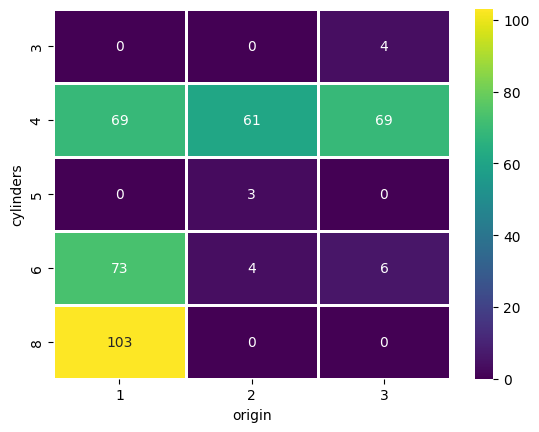

In [147]:
sns.heatmap(df,linewidth=2,linecolor='w',annot=True,cmap='viridis',fmt='g')

# Insights

 1.Maximum number of cars(103) are from Origin 1 with 8 Cylinders

 2.There are no cars with 5 and 3 cylinders in origin 1

 3.There are no cars with 8 and 3 cylinders in origin 2

 4.There are no cars with 8 and 5 cylinders in origin 3

In [154]:
df1=pd.crosstab(df['model year'],df['origin'])
df1

origin,1,2,3
model year,,,
70,22,5,2
71,20,4,4
72,18,5,5
73,29,7,4
74,15,6,6
75,20,6,4
76,22,8,4
77,18,4,6
78,22,6,8


<Axes: xlabel='origin', ylabel='model year'>

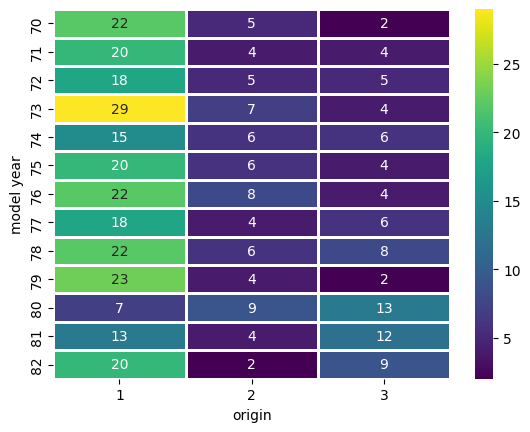

In [155]:
sns.heatmap(df1,annot=True,cmap='viridis',linewidth=2,linecolor='w',fmt='g')

# Insights

1.Maximum number of cars(29) are manufactured from origin 1 in the year 73 

2.Origin 2 has manufactured least number of cars i.e.,<10

3.Origin 1 has manufactured more cars when compared to other regions.

In [156]:
df2=pd.crosstab(df['model year'],df['cylinders'])
df2

cylinders,3,4,5,6,8
model year,,,,,
70,0,7,0,4,18
71,0,13,0,8,7
72,1,14,0,0,13
73,1,11,0,8,20
74,0,15,0,7,5
75,0,12,0,12,6
76,0,15,0,10,9
77,1,14,0,5,8
78,0,17,1,12,6


<Axes: xlabel='cylinders', ylabel='model year'>

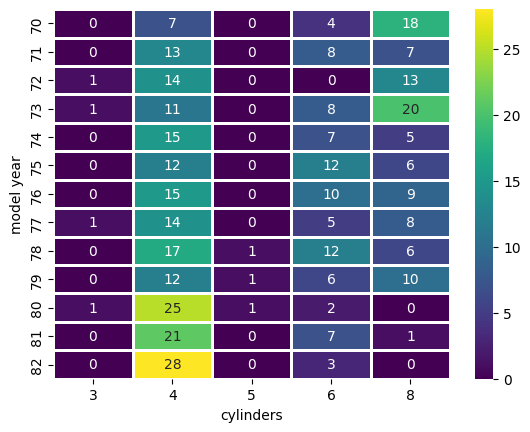

In [157]:
sns.heatmap(df2,annot=True,linewidth=2,linecolor='w',fmt='g',cmap='viridis')

# Insights

1.Maximum numbers of cars(28) has 4 cylinders and it is manufactured in year 82

2.very least cars are manufactured in all the years with cylinders 3 and 5

3.In the year 70 and 73 maximum cars are manufactured with 8 cylinders.

4.In the year 75 and 78 same no of cars are manufactured with 6 cylinders.

5.Manufacturing of cars with 4 cylinders are increasing year by year. 

###Outcome/Summary of EDA with respect to Objectives:
**Finding the characterstics of vehicles with Max MPG**

1.Cars with greater Horse power or diaplcement have less MPG.

2.Acceleration of Car is in correlation with MPG

3.Increase in number of Cylinders is reducing the MPG. Cars with 4 Cylinders showed greater MPG and Cars with 8 Cylinders showed reduced MPG


**Finding the characterstics of vehicles with Max power**

1.Increase in Horse power (Engine performace) means less milage

2.Horse power and displacement showed high positive correlation

**Growth or improvements year by year**

Year by year manufacturers are focusing on improving the MPG, hence we could see growth in MPG year by year.

**Characterstics of vehicles based on Origin**

1.The production in Origin 1 is more and they are manufacturing horse power cars, hence the MPG is not so great. Even they are using 8 cylinders more,

2.Origin 3 is producing good MPG cars by using optimal number of Cylinders, displacement and horse power